# K-means clustering

## Learning objectives
- implement K-means clustering from scratch

## The algorithm
# draw algorithm
- initialise k points in feature space representing the central point of a certain class
- until converged
    - assign each datapoint to the class represented by the nearest centroid
    - update the centroid position to the average feature vector of all of the datapoints currently assigned to initialise

## Implementation from scratch

### Make some fake data


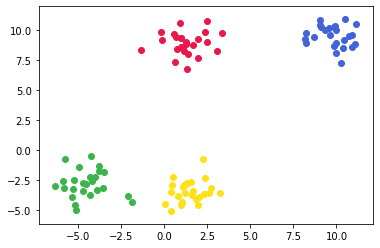

In [18]:
import sklearn.datasets
import matplotlib.pyplot as plt
from get_colors import colors

m = 100
n_features = 2
n_clusters = 4
X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=1.0)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

def show_data(X, Y, predictions=None, centroids=None):
    for i in range(n_clusters):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
        if centroids is not None:
            plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], s=300, marker='o')
    plt.show()

show_data(X, Y)

### Implement the algorithm





converged: False


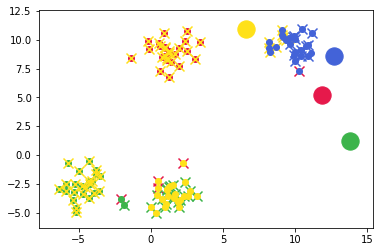

converged: False


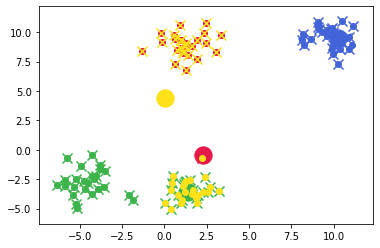

converged: False


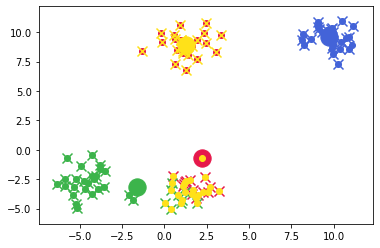

converged: False


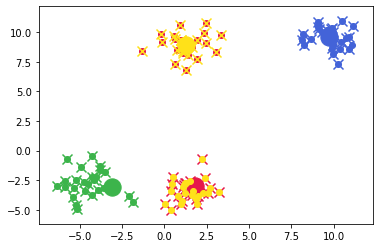

converged: True


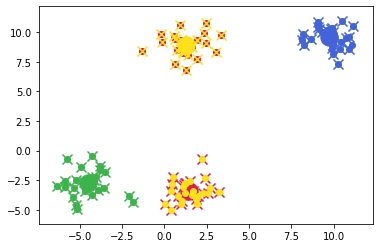

In [20]:
import numpy as np

centroids = np.random.uniform(0, 1, (n_clusters, n_features))
centroids[:, 0] *= np.ptp(X[:, 0])
centroids[:, 1] *= np.ptp(X[:, 1])
converged = False
predictions = np.zeros(m)

while not converged:
    old_predictions = np.copy(predictions)
    for idx, x in enumerate(X):
        diff = x - centroids
        dists = np.linalg.norm(diff, axis=1) # take distance from each datapoint to each centroid
        closest_centroid_idx = np.argmin(dists)
        predictions[idx] = closest_centroid_idx

    print('converged:', np.array_equal(predictions, old_predictions))
    if np.array_equal(predictions, old_predictions):
        converged = True
    if idx == 100:
        converged = True
    
    show_data(X, Y, predictions, centroids)

    for i in range(n_clusters):
        class_members = X[predictions == i]
        if len(class_members) > 0:
            new_centroid = np.mean(class_members, axis=0)
            centroids[i] = new_centroid

## Limitations of the algorithm
- if one centroid is never the closest one to any datapoint, then it will not be updated, and will represent a random point in space
    - this may not be obvious if the data is too high dimensional to visualise
- in the unsupervised case, it may not be obvious what the best K to use is

# show examples of data that this algorithm cannot split (e.g. concentric circles)

## Challenges
- extend this algorithm and visualisation to 3d

## Summary
- K-means clustering is a non-parametric machine learning algorithm used for clustering
- K is the number of clusters that you choose to group the data into
- K-means clustering can be used for both supervised and unsupervised learning. Above we showed the supervised case
